In [193]:
path = "../AML_Assignment2/cifar/"
import numpy as np
import pickle
from PIL import Image
import matplotlib.pyplot as plt

def extractImagesAndLabels(path, file):
    f = open(path+file, 'rb')
    dicte = pickle.load(f,encoding='bytes')
    images = dicte[b'data']
    Matrix=[]
    image_mean = np.mean(images)
    for i in images:
        ingle_img_reshaped = np.reshape(i,(3, 32,32))
        ingle_img_reshaped = ingle_img_reshaped - image_mean
        ingle_img_reshaped = ingle_img_reshaped/128
#         ingle_img_reshaped = np.transpose(ingle_img_reshaped, (1,2,0))
        #x=np.dot(ingle_img_reshaped[...,:3], [0.299, 0.587, 0.114])
#         x= ingle_img_reshaped.flatten()
        Matrix.append(ingle_img_reshaped)
    #images = np.transpose(images, (1,2,0))
   
    Matrix = np.array(Matrix)
    labels = dicte[b'labels']
    labels = np.array(labels)
    #print labels.shape
    return Matrix, labels
 
#     labels = dict['labels']

def extractCategories(path, file):
    f = open(path+file, 'rb')
    dict = pickle.load(f,encoding='bytes')
    return dict[b'label_names']

def saveCifarImage(array, path, file):
    # array is 3x32x32. cv2 needs 32x32x3
    array = array.asnumpy().transpose(1,2,0)
    # array is RGB. cv2 needs BGR
    array = cv2.cvtColor(array, cv2.COLOR_RGB2BGR)
    # save to PNG file
    return cv2.imwrite(path+file+".png", array)


Train_data, Train_labels = extractImagesAndLabels(path, "data_batch_1")
Train_data_2, Train_labels_2 = extractImagesAndLabels(path,"data_batch_2")
Train_data_3, Train_labels_3 = extractImagesAndLabels(path, "data_batch_3")
Train_data_3, Train_labels_3 = extractImagesAndLabels(path, "data_batch_3")
Train_data_4, Train_labels_4 = extractImagesAndLabels(path, "data_batch_3")
Train_data_5, Train_labels_5 = extractImagesAndLabels(path, "data_batch_3")
Train_data_t = np.concatenate((Train_data, Train_data_2,Train_data_3,Train_data_4,Train_data_5), axis=0)
Train_labels_t = np.concatenate((Train_labels,Train_labels_2,Train_labels_3,Train_labels_4,Train_labels_5), axis=0)
print (Train_data_t.shape)
Test_data, Test_labels = extractImagesAndLabels(path, "test_batch")

(50000, 3, 32, 32)


In [194]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [223]:
def weight_init(m): 
    if isinstance(m, nn.Linear):
        size = m.weight.size()
        fan_out = size[0] # number of rows
        fan_in = size[1] # number of columns
        variance = np.sqrt(2.0/(fan_in + fan_out))
        m.weight.data.normal_(0.0, variance)

class ConvNet(nn.Module):
    def __init__(self,num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
                    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=0),            
                    nn.PReLU(),
                    nn.MaxPool2d(kernel_size=3, stride=2))
#         torch.nn.init.xavier_uniform(self.layer1.weight)
        self.layer2 = nn.Sequential(
                    nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=0),
                    nn.PReLU(),
                    nn.MaxPool2d(kernel_size=3, stride=1))
        self.layer3 = nn.Sequential(
                       nn.Conv2d(32,64,kernel_size=3, stride=1, padding=0),
                        nn.PReLU()
                    )
        self.layer4 = nn.Sequential(
                       nn.Conv2d(64,64,kernel_size=3, stride=1, padding=0),
                        nn.PReLU())
        self.fc1 = nn.Linear(2304, 500)
        self.pre = nn.PReLU()
        self.fc2 = nn.Linear(500, num_classes)
        self.pre2 = nn.PReLU()
        self.soft = nn.Softmax()
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
#         out = out.view(out
#         out = out.reshape()
#         print(out.size())
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
#         print(out.size())
        out = self.pre(out)
        out = self.fc2(out)
        out = self.pre2(out)
#         print(out.size())
        out = self.soft(out)
#         print(out.size())
        return out    

In [ ]:
class ConvNet(nn.Module):
    def __init__(self,num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
                    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=0),            
                    nn.PReLU(),
                    nn.MaxPool2d(kernel_size=3, stride=2))
#         torch.nn.init.xavier_uniform(self.layer1.weight)
        self.layer2 = nn.Sequential(
                    nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=0),
                    nn.PReLU(),
                    nn.MaxPool2d(kernel_size=3, stride=1))
        self.layer3 = nn.Sequential(
                       nn.Conv2d(32,64,kernel_size=3, stride=1, padding=0),
                        nn.PReLU()
                    )
        self.layer4 = nn.Sequential(
                       nn.Conv2d(64,64,kernel_size=3, stride=1, padding=0),
                        nn.PReLU())
        self.layer5 = nn.Sequential(
                       nn.Conv2d(64,128,kernel_size=3, stride=1, padding=0),
                        nn.PReLU())
        self.layer6 = nn.Sequential(
                       nn.Conv2d(128,128,kernel_size=3, stride=1, padding=0),
                        nn.PReLU())
        
        self.fc1 = nn.Linear(512, 256)
        self.pre = nn.PReLU()
        self.fc2 = nn.Linear(256, num_classes)
        self.pre2 = nn.PReLU()
        self.soft = nn.Softmax()
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
#         out = out.view(out
#         out = out.reshape()
#         print(out.size())
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
#         print(out.size())
        out = self.pre(out)
        out = self.fc2(out)
        out = self.pre2(out)
#         print(out.size())
        out = self.soft(out)
#         print(out.size())
        return out    

In [224]:
import torch.utils.data as data_utils



Train_data_t = torch.from_numpy(Train_data_t)
Train_labels_t = torch.from_numpy(Train_labels_t)
train = data_utils.TensorDataset(Train_data_t, Train_labels_t)
train_loader = data_utils.DataLoader(train, batch_size=50, shuffle=True)

TypeError: expected np.ndarray (got Tensor)

In [225]:
num_classes=10
model = ConvNet(num_classes).cuda()
# model.apply(weight_init)
# print(model)
# exam = torch.FloatTensor(Train_data_t[0,:,:,:])
# exam = exam.unsqueeze(0)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [230]:
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
num_epochs=100
from torch.autograd import Variable
total_step =len(Train_data_t)

In [231]:
# loss = Variable(torch.cuda.FloatTensor([0]))
los =[]
epoch=[]
for epoch in range(num_epochs):
    
    for i, (images,labels) in enumerate(train_loader):
        images = images.type(torch.FloatTensor)
        
#             images = torch.FloatTensor(images)
        images = images.to(device)
        labels = labels.to(device)
#             print(Train_labels_t[i])
#             labels = Variable(torch.LongTensor([Train_labels_t[i]])).to(device)
        # Forward pass
#             print(images.size())
#             images = images.unsqueeze(0)
        optimizer.zero_grad()
        outputs = model(images)
#         print(images.size(),outputs.size())
#             print(outputs,"        ",labels)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        los.append(loss.data[0])
            
#             print (loss.data[0])
#             lo.append(loss_contrastive.data[0])
            
#             loss_contrastive += Variable(torch.FloatTensor([0]))
#             loss_contrastive.backward(retain_graph=True)
            
#         optimizer.step()
#         loss = Variable(torch.cuda.FloatTensor([0]))
#         else:
#             images = torch.FloatTensor(images)
#             images = images.to(device)
# #             print(Train_labels_t[i])
#             labels = Variable(torch.LongTensor([Train_labels_t[i]])).to(device)
#             # Forward pass
# #             print(images.size())
#             images = images.unsqueeze(0)
#             outputs = model(images)
# #             print(outputs,"        ",labels)
#             loss += criterion(outputs, labels)
            
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [1/100], Step [100/50000], Loss: 2.3026
Epoch [1/100], Step [200/50000], Loss: 2.3022
Epoch [1/100], Step [300/50000], Loss: 2.3026
Epoch [1/100], Step [400/50000], Loss: 2.3025
Epoch [1/100], Step [500/50000], Loss: 2.3018
Epoch [1/100], Step [600/50000], Loss: 2.3032
Epoch [1/100], Step [700/50000], Loss: 2.3027
Epoch [1/100], Step [800/50000], Loss: 2.3033
Epoch [1/100], Step [900/50000], Loss: 2.3020
Epoch [1/100], Step [1000/50000], Loss: 2.3026
Epoch [2/100], Step [100/50000], Loss: 2.3028
Epoch [2/100], Step [200/50000], Loss: 2.3026
Epoch [2/100], Step [300/50000], Loss: 2.3029
Epoch [2/100], Step [400/50000], Loss: 2.3034
Epoch [2/100], Step [500/50000], Loss: 2.3022
Epoch [2/100], Step [600/50000], Loss: 2.3024
Epoch [2/100], Step [700/50000], Loss: 2.3023
Epoch [2/100], Step [800/50000], Loss: 2.3024
Epoch [2/100], Step [900/50000], Loss: 2.3023
Epoch [2/100], Step [1000/50000], Loss: 2.3026
Epoch [3/100], Step [100/50000], Loss: 2.3026
Epoch [3/100], Step [200/50000],

Epoch [18/100], Step [700/50000], Loss: 2.0261
Epoch [18/100], Step [800/50000], Loss: 2.0658
Epoch [18/100], Step [900/50000], Loss: 1.9454
Epoch [18/100], Step [1000/50000], Loss: 1.9527
Epoch [19/100], Step [100/50000], Loss: 2.0351
Epoch [19/100], Step [200/50000], Loss: 2.0606
Epoch [19/100], Step [300/50000], Loss: 2.1119
Epoch [19/100], Step [400/50000], Loss: 1.8834
Epoch [19/100], Step [500/50000], Loss: 2.0928
Epoch [19/100], Step [600/50000], Loss: 1.9142
Epoch [19/100], Step [700/50000], Loss: 1.9628
Epoch [19/100], Step [800/50000], Loss: 2.0209
Epoch [19/100], Step [900/50000], Loss: 2.0317
Epoch [19/100], Step [1000/50000], Loss: 2.0216
Epoch [20/100], Step [100/50000], Loss: 2.0127
Epoch [20/100], Step [200/50000], Loss: 1.9997
Epoch [20/100], Step [300/50000], Loss: 1.9320
Epoch [20/100], Step [400/50000], Loss: 1.9731
Epoch [20/100], Step [500/50000], Loss: 1.9713
Epoch [20/100], Step [600/50000], Loss: 2.0711
Epoch [20/100], Step [700/50000], Loss: 1.8583
Epoch [20/1

Epoch [36/100], Step [100/50000], Loss: 1.8177
Epoch [36/100], Step [200/50000], Loss: 1.7343
Epoch [36/100], Step [300/50000], Loss: 1.8086
Epoch [36/100], Step [400/50000], Loss: 1.7932
Epoch [36/100], Step [500/50000], Loss: 1.8896
Epoch [36/100], Step [600/50000], Loss: 1.8268
Epoch [36/100], Step [700/50000], Loss: 1.9105
Epoch [36/100], Step [800/50000], Loss: 1.8915
Epoch [36/100], Step [900/50000], Loss: 1.8371
Epoch [36/100], Step [1000/50000], Loss: 1.8322
Epoch [37/100], Step [100/50000], Loss: 1.7863
Epoch [37/100], Step [200/50000], Loss: 1.8433
Epoch [37/100], Step [300/50000], Loss: 1.7767
Epoch [37/100], Step [400/50000], Loss: 1.8531
Epoch [37/100], Step [500/50000], Loss: 1.7911
Epoch [37/100], Step [600/50000], Loss: 1.7620
Epoch [37/100], Step [700/50000], Loss: 1.8591
Epoch [37/100], Step [800/50000], Loss: 1.7217
Epoch [37/100], Step [900/50000], Loss: 1.8749
Epoch [37/100], Step [1000/50000], Loss: 1.7109
Epoch [38/100], Step [100/50000], Loss: 1.8043
Epoch [38/1

Epoch [53/100], Step [500/50000], Loss: 1.6041
Epoch [53/100], Step [600/50000], Loss: 1.7013
Epoch [53/100], Step [700/50000], Loss: 1.7934
Epoch [53/100], Step [800/50000], Loss: 1.7185
Epoch [53/100], Step [900/50000], Loss: 1.7110
Epoch [53/100], Step [1000/50000], Loss: 1.6807
Epoch [54/100], Step [100/50000], Loss: 1.6566
Epoch [54/100], Step [200/50000], Loss: 1.7806
Epoch [54/100], Step [300/50000], Loss: 1.7819
Epoch [54/100], Step [400/50000], Loss: 1.6588
Epoch [54/100], Step [500/50000], Loss: 1.6568
Epoch [54/100], Step [600/50000], Loss: 1.7690
Epoch [54/100], Step [700/50000], Loss: 1.7671
Epoch [54/100], Step [800/50000], Loss: 1.7345
Epoch [54/100], Step [900/50000], Loss: 1.8610
Epoch [54/100], Step [1000/50000], Loss: 1.6685
Epoch [55/100], Step [100/50000], Loss: 1.6131
Epoch [55/100], Step [200/50000], Loss: 1.7003
Epoch [55/100], Step [300/50000], Loss: 1.6576
Epoch [55/100], Step [400/50000], Loss: 1.6847
Epoch [55/100], Step [500/50000], Loss: 1.6924
Epoch [55/1

Epoch [70/100], Step [900/50000], Loss: 1.6202
Epoch [70/100], Step [1000/50000], Loss: 1.8091
Epoch [71/100], Step [100/50000], Loss: 1.6991
Epoch [71/100], Step [200/50000], Loss: 1.7162
Epoch [71/100], Step [300/50000], Loss: 1.6275
Epoch [71/100], Step [400/50000], Loss: 1.7823
Epoch [71/100], Step [500/50000], Loss: 1.5705
Epoch [71/100], Step [600/50000], Loss: 1.6676
Epoch [71/100], Step [700/50000], Loss: 1.6615
Epoch [71/100], Step [800/50000], Loss: 1.6803
Epoch [71/100], Step [900/50000], Loss: 1.7998
Epoch [71/100], Step [1000/50000], Loss: 1.6261
Epoch [72/100], Step [100/50000], Loss: 1.6170
Epoch [72/100], Step [200/50000], Loss: 1.6288
Epoch [72/100], Step [300/50000], Loss: 1.6590
Epoch [72/100], Step [400/50000], Loss: 1.7125
Epoch [72/100], Step [500/50000], Loss: 1.6991
Epoch [72/100], Step [600/50000], Loss: 1.6450
Epoch [72/100], Step [700/50000], Loss: 1.6795
Epoch [72/100], Step [800/50000], Loss: 1.6850
Epoch [72/100], Step [900/50000], Loss: 1.6177
Epoch [72/1

Epoch [88/100], Step [300/50000], Loss: 1.6614
Epoch [88/100], Step [400/50000], Loss: 1.8124
Epoch [88/100], Step [500/50000], Loss: 1.5862
Epoch [88/100], Step [600/50000], Loss: 1.6778
Epoch [88/100], Step [700/50000], Loss: 1.6409
Epoch [88/100], Step [800/50000], Loss: 1.7626
Epoch [88/100], Step [900/50000], Loss: 1.6269
Epoch [88/100], Step [1000/50000], Loss: 1.6052
Epoch [89/100], Step [100/50000], Loss: 1.6908
Epoch [89/100], Step [200/50000], Loss: 1.6792
Epoch [89/100], Step [300/50000], Loss: 1.7207
Epoch [89/100], Step [400/50000], Loss: 1.6921
Epoch [89/100], Step [500/50000], Loss: 1.7490
Epoch [89/100], Step [600/50000], Loss: 1.5990
Epoch [89/100], Step [700/50000], Loss: 1.7422
Epoch [89/100], Step [800/50000], Loss: 1.6807
Epoch [89/100], Step [900/50000], Loss: 1.6210
Epoch [89/100], Step [1000/50000], Loss: 1.8408
Epoch [90/100], Step [100/50000], Loss: 1.6390
Epoch [90/100], Step [200/50000], Loss: 1.6133
Epoch [90/100], Step [300/50000], Loss: 1.5818
Epoch [90/1

In [233]:
import pickle as pkl
pkl.dump(los, open("los_2.pkl","wb"))

In [234]:
torch.save(model, "model_2.pth")

/home/mohit1_aml/anaconda3/envs/mohitpy36/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type ConvNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [235]:
print(len(los))
new_l=[]
for i,l in enumerate(los):
    if i%1000==0:
        new_l.append(l)

epoch = [i for i in range(100)]

100000


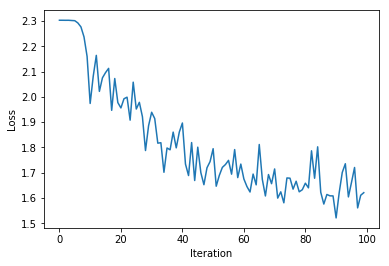

In [236]:
import matplotlib.pyplot as plt
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.plot(epoch,new_l)